# Data Analysis and Visualization Assignment

Q 1 Given the following list of strings

List1 = ['Good Morning', 'Good Evening', 'Hello', 'Good afternoon', 'Greetings','Good Morning', 'Nice to see you']

Perform the following operations

a) Use list comprehension to store unique strings with multi-words of 'List1' to another list named ‘Newlist’. Also, write an anonymous function to sort the given list ‘List1’ on the last character of each string.

b) Using ‘List1’, generate the following dictionary ‘Anydict’ where key is the count of words in a string and value is the list of strings having that count. Anydict={1:[ 'Greetings','Hello'], 2: ['Good Morning', ' Good Evening', 'Good afternoon', 'Good Morning'], 4: ['Nice to see you']}. Create a data series ‘Ds1’ using the created dictionary ‘Anydict’.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

#### Answer a: 

In [86]:
List1 = ['Good Morning', 'Good Evening', 'Hello', 'Good afternoon', 'Greetings', 'Good Morning', 'Nice to see you']

# List comprehension to store unique strings with multi-words to 'Newlist'
Newlist = list(set([word for word in List1 if ' ' in word]))

# Anonymous function to sort List1 based on the last character of each string
List1.sort(key=lambda x: x[-1])

# Printing the results
print("Newlist:", Newlist)
print("Sorted List1:", List1)


Newlist: ['Nice to see you', 'Good afternoon', 'Good Evening', 'Good Morning']
Sorted List1: ['Good Morning', 'Good Evening', 'Good Morning', 'Good afternoon', 'Hello', 'Greetings', 'Nice to see you']


#### Answer b: 

In [87]:
Anydict = {}
for item in List1:
    word_count = len(item.split())
    if word_count in Anydict:
        Anydict[word_count].append(item)
    else:
        Anydict[word_count] = [item]

# Printing the dictionary
print("Anydict:", Anydict)



Anydict: {2: ['Good Morning', 'Good Evening', 'Good Morning', 'Good afternoon'], 1: ['Hello', 'Greetings'], 4: ['Nice to see you']}


In [88]:
# Creating a data series 'Ds1' using the created dictionary 'Anydict'
Ds1 = pd.Series(Anydict)

# Printing the data series
print("Ds1:")
print(Ds1)


Ds1:
2    [Good Morning, Good Evening, Good Morning, Goo...
1                                   [Hello, Greetings]
4                                    [Nice to see you]
dtype: object


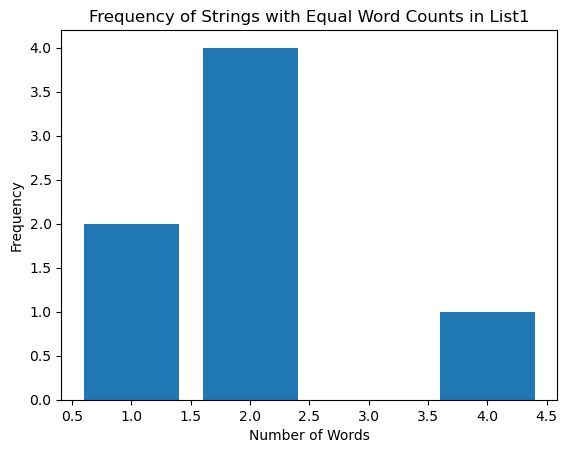

In [89]:
# Part c
plt.bar(Ds1.index, Ds1.apply(len))
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Frequency of Strings with Equal Word Counts in List1')
plt.show()

Q 2 Consider the following DataFrame EXERCISE to answer the given questions where ‘Kind’ attribute indicates the type of exercise regime followed.

a) Create a new DataFrame SELECTED having a hierarchical index on columns “Name” and “Diet”. Then, find the maximum pulse rate for each individual in the SELECTED DataFrame.

b) Count the total number of records of individuals having names ‘A’ or ‘B’ and who are following a low fat diet plan from the data frame SELECTED created in part (a). Also, sort DataFrame SELECTED on index at first level in descending order.

c) Using DataFrame EXERCISE, create a figure with two subplots and save the figure with the name ‘exerciseplot.jpeg’. Set title of the figure as ‘EXERCISE’. First subplot compares the average pulse rate of individualsand the second subplot shows the relationship between variables ‘Pulse’ and ‘Time’. Do color encoding using variable ‘kind’ in the scatter plot.

#### Answer a: 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
# Given DataFrame EXERCISE
data = {'ID': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
        'Name': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'D', 'E', 'E', 'E'],
        'Diet': ['low fat', 'low fat', 'no fat', 'no fat', 'no fat', 'low fat', 'low fat', 'low fat', 'low fat', 'low fat', 'low fat', 'low fat', 'no fat', 'low fat', 'low fat'],
        'Pulse': [85, 85, 88, 90, 92, 93, 97, 97, 94, 80, 82, 83, 91, 92, 91],
        'Time (min)': [40, 45, 30, 10, 15, 30, 15, 15, 30, 10, 15, 30, 10, 15, 30],
        'Kind': ['walking', 'walking', 'running', 'walking', 'rest', 'rest', 'rest', 'rest', 'walking', 'walking', 'rest', 'rest', 'rest', 'running', 'running']}

EXERCISE = pd.DataFrame(data)
display(EXERCISE)

,ID,Name,Diet,Pulse,Time (min),Kind
0,0,A,low fat,85,40,walking
1,1,A,low fat,85,45,walking
2,2,A,no fat,88,30,running
3,3,B,no fat,90,10,walking
4,4,B,no fat,92,15,rest
5,5,B,low fat,93,30,rest
6,6,C,low fat,97,15,rest
7,7,C,low fat,97,15,rest
8,8,C,low fat,94,30,walking
9,9,D,low fat,80,10,walking


In [110]:
# Create a new DataFrame SELECTED with hierarchical index on columns 'Name' and 'Diet'
SELECTED = EXERCISE.set_index(['Name', 'Diet'])
print(SELECTED)

              ID  Pulse  Time (min)     Kind
Name Diet                                   
A    low fat   0     85          40  walking
     low fat   1     85          45  walking
     no fat    2     88          30  running
B    no fat    3     90          10  walking
     no fat    4     92          15     rest
     low fat   5     93          30     rest
C    low fat   6     97          15     rest
     low fat   7     97          15     rest
     low fat   8     94          30  walking
D    low fat   9     80          10  walking
     low fat  10     82          15     rest
     low fat  11     83          30     rest
E    no fat   12     91          10     rest
     low fat  13     92          15  running
     low fat  14     91          30  running


In [111]:
# Find the maximum pulse rate for each individual in the SELECTED DataFrame
max_pulse = SELECTED.groupby(level=['Name', 'Diet'])['Pulse'].max()
print(max_pulse)

Name  Diet   
A     low fat    85
      no fat     88
B     low fat    93
      no fat     92
C     low fat    97
D     low fat    83
E     low fat    92
      no fat     91
Name: Pulse, dtype: int64


In [112]:
# b) Count the total number of records of individuals with names 'A' or 'B' and a low fat diet
count_AB_lowfat = SELECTED.loc[pd.IndexSlice[['A', 'B'], 'low fat'], :].shape[0]
print(count_AB_lowfat)

3


In [44]:
# Sort DataFrame SELECTED on index at the first level in descending order
NEW_SELECTED = SELECTED.sort_index(level='Name', sort_remaining=False, ascending=False)
print(NEW_SELECTED)

              ID  Pulse  Time (min)     Kind
Name Diet                                   
E    low fat  14     91          30  running
     low fat  13     92          15  running
     no fat   12     91          10     rest
D    low fat  11     83          30     rest
     low fat  10     82          15     rest
     low fat   9     80          10  walking
C    low fat   8     94          30  walking
     low fat   7     97          15     rest
     low fat   6     97          15     rest
B    low fat   5     93          30     rest
     no fat    4     92          15     rest
     no fat    3     90          10  walking
A    no fat    2     88          30  running
     low fat   1     85          45  walking
     low fat   0     85          40  walking


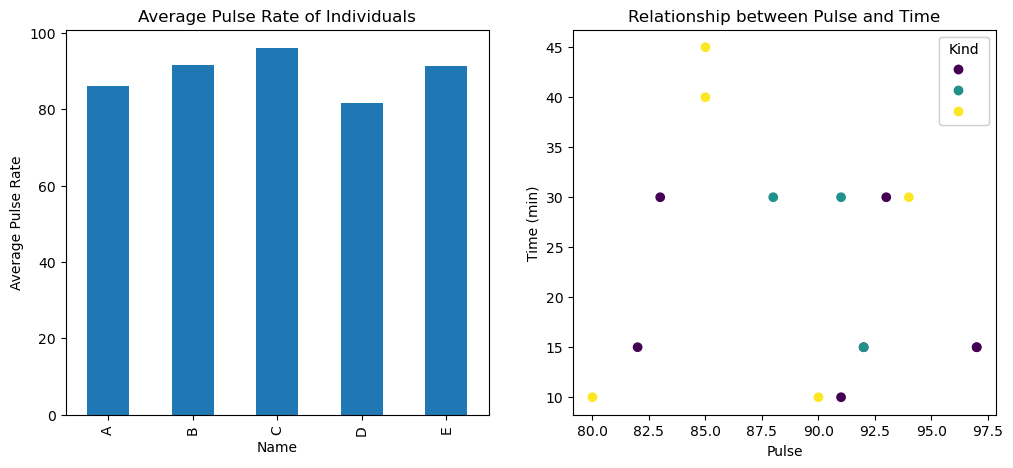

In [51]:
EXERCISE = pd.DataFrame(data)

# Convert 'Kind' to categorical for proper color encoding
EXERCISE['Kind'] = pd.Categorical(EXERCISE['Kind'])

# Create a figure with two subplots and save as 'exerciseplot.jpeg'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot 1: Compare average pulse rate of individuals using DataFrame EXERCISE
EXERCISE.groupby('Name')['Pulse'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Pulse Rate of Individuals')
axes[0].set_ylabel('Average Pulse Rate')

# Subplot 2: Relationship between variables 'Pulse' and 'Time' with color encoding using 'Kind'
scatter_plot = axes[1].scatter(x='Pulse', y='Time (min)', c=EXERCISE['Kind'].cat.codes, cmap='viridis', data=EXERCISE)
axes[1].set_title('Relationship between Pulse and Time')
axes[1].set_xlabel('Pulse')
axes[1].set_ylabel('Time (min)')

# Create a legend for the scatter plot
legend = axes[1].legend(handles=scatter_plot.legend_elements()[0], title='Kind')
axes[1].add_artist(legend)

# Save the figure
plt.savefig('exerciseplot.jpeg')

# Show the plot
plt.show()

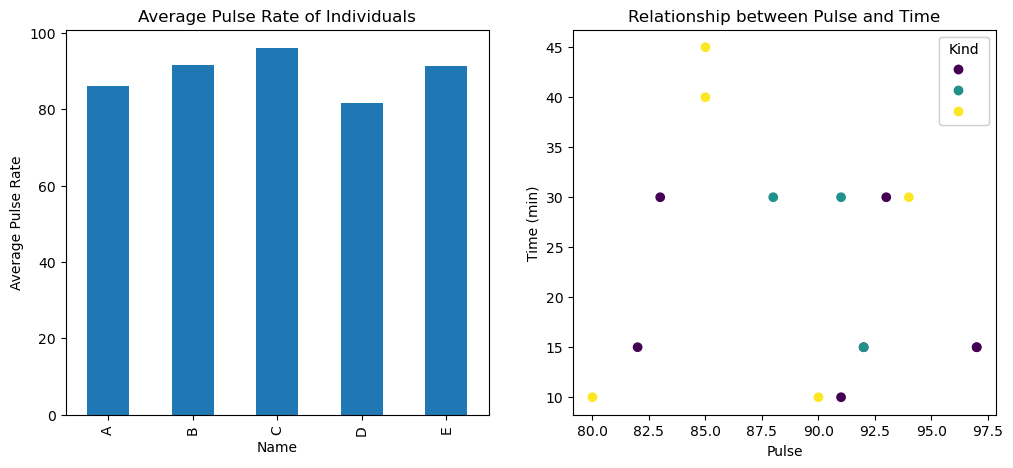

In [49]:
EXERCISE = pd.DataFrame(data)

# Convert 'Kind' to categorical for proper color encoding
EXERCISE['Kind'] = pd.Categorical(EXERCISE['Kind'])

# Create a figure with two subplots and save as 'exerciseplot.jpeg'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot 1: Compare average pulse rate of individuals using DataFrame EXERCISE
EXERCISE.groupby('Name')['Pulse'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Pulse Rate of Individuals')
axes[0].set_ylabel('Average Pulse Rate')

# Subplot 2: Relationship between variables 'Pulse' and 'Time' with color encoding using 'Kind'
scatter_plot = axes[1].scatter(x='Pulse', y='Time (min)', c=EXERCISE['Kind'].cat.codes, cmap='viridis', data=EXERCISE)
axes[1].set_title('Relationship between Pulse and Time')
axes[1].set_xlabel('Pulse')
axes[1].set_ylabel('Time (min)')

# Create a legend for the scatter plot
legend = axes[1].legend(handles=scatter_plot.legend_elements()[0], title='Kind')
axes[1].add_artist(legend)

# Save the figure
plt.savefig('exerciseplot.jpeg')

# Show the plot
plt.show()

Q3
a) Given the following commands to create series sr
import numpy as np
import pandas as pd
sr = pd.Series([‘Madhuri’,’AjaySh@rma’, ‘R@ni’, ‘Radha’,np.nan,’Smita’,’3567’])
Write separate commands to compute the length of each string in the series, replace @ with ‘a’ in all strings in the series, count the occurrences of ‘a’ in each string, change the case of all letters, find all strings with pattern ‘adh’ in them and find all strings that end with letter ‘i’.

b) Create a DataFrame of 7 rows and 7 columns containing random integers in the range of 1 to 100. Compute the correlation of each row with the preceding row.

c) Write Numpy code to generate a random list of 100 integers (range of 55 to 150) and identify the index of the largest element and smallest element. Change this list into a 10 x 10 matrix and replace all diagonal elements with 1.


#### Anwer a: 

In [70]:
import numpy as np
import pandas as pd

# Given series with NaN
sr = pd.Series(['Madhuri', 'AjaySh@rma', 'R@ni', 'Radha', np.nan, 'Smita', '3567'])

# Compute the length of each string in the series
lengths = sr.str.len()
print("Lengths of each string:\n", lengths)

# Replace '@' with 'a' in all strings in the series, handling NaN
replace_at = sr.str.replace('@', 'a').fillna(sr)
print("\nReplace '@' with 'a':\n", replace_at)

# Count the occurrences of 'a' in each string, handling NaN
count_a = sr.str.count('a').fillna(0)
print("\nCount of occurrences of 'a':\n", count_a)

# Change the case of all letters, handling NaN
change_case = sr.str.swapcase().fillna(sr)
print("\nChange case of all letters:\n", change_case)

# Find all strings with the pattern 'adh' in them, handling NaN
pattern_adh = sr[sr.str.contains('adh', na=False)]
print("\nStrings with pattern 'adh':\n", pattern_adh)

# Find all strings that end with the letter 'i', handling NaN
ends_with_i = sr[sr.str.endswith('i', na=False)]
print("\nStrings ending with 'i':\n", ends_with_i)

Lengths of each string:
 0     7.0
1    10.0
2     4.0
3     5.0
4     NaN
5     5.0
6     4.0
dtype: float64

Replace '@' with 'a':
 0       Madhuri
1    AjaySharma
2          Rani
3         Radha
4           NaN
5         Smita
6          3567
dtype: object

Count of occurrences of 'a':
 0    1.0
1    2.0
2    0.0
3    2.0
4    0.0
5    1.0
6    0.0
dtype: float64

Change case of all letters:
 0       mADHURI
1    aJAYsH@RMA
2          r@NI
3         rADHA
4           NaN
5         sMITA
6          3567
dtype: object

Strings with pattern 'adh':
 0    Madhuri
3      Radha
dtype: object

Strings ending with 'i':
 0    Madhuri
2       R@ni
dtype: object


#### Anwer b: 

In [72]:
import numpy as np
import pandas as pd

# Create a DataFrame of 7 rows and 7 columns containing random integers in the range of 1 to 100
df = pd.DataFrame(np.random.randint(1, 100, size=(7, 7)))
print("Original DataFrame:\n", df)

# Compute the correlation of each row with the preceding row
row_correlation = df.corrwith(df.shift(1))
print("\nCorrelation of each row with the preceding row:\n", row_correlation)

Original DataFrame:
     0   1   2   3   4   5   6
0  73  19  40  37  59  66  87
1  22  32  48  28  31  82   3
2  17  84  45   1  41  27  67
3  97  17  53  50  56  73  67
4  32   5  15   5  15  82  64
5   5  27  16  31  87  37  61
6  10  59  10  41  71  37  36

Correlation of each row with the preceding row:
 0   -0.091788
1   -0.082334
2    0.557048
3   -0.630872
4   -0.235174
5   -0.230544
6   -0.544138
dtype: float64


#### Anwer c:  

In [73]:
import numpy as np

# Write Numpy code to generate a random list of 100 integers (range of 55 to 150)
random_list = np.random.randint(55, 150, size=100)
print("Random list of 100 integers:\n", random_list)

# Identify the index of the largest element and smallest element
index_of_max = np.argmax(random_list)
index_of_min = np.argmin(random_list)
print("\nIndex of the largest element:", index_of_max)
print("Index of the smallest element:", index_of_min)

# Change this list into a 10 x 10 matrix
matrix_10x10 = random_list.reshape(10, 10)
print("\nMatrix 10x10:\n", matrix_10x10)

# Replace all diagonal elements with 1
np.fill_diagonal(matrix_10x10, 1)
print("\nMatrix 10x10 with diagonal elements replaced by 1:\n", matrix_10x10)

Random list of 100 integers:
 [114  61  78  82 138  59 119 114  98  63 146 119 111 143  70 113 135 114
  87 144  70  92  59  98  61 130  73 133  86  59 120 146 119 105 101 133
 142 112  87 148  86 148 144 103  97 119 143  72 106 116  59 108  85  78
  98 123  56 138  84  59  67  98  80  78  61 102  77  99 140 119 121 119
  96  67  88 132  69 109  65  71  75 140 117  61 133 136  55 121  72  91
  85  99  91  56 112  74 127  72 130  71]

Index of the largest element: 39
Index of the smallest element: 86

Matrix 10x10:
 [[114  61  78  82 138  59 119 114  98  63]
 [146 119 111 143  70 113 135 114  87 144]
 [ 70  92  59  98  61 130  73 133  86  59]
 [120 146 119 105 101 133 142 112  87 148]
 [ 86 148 144 103  97 119 143  72 106 116]
 [ 59 108  85  78  98 123  56 138  84  59]
 [ 67  98  80  78  61 102  77  99 140 119]
 [121 119  96  67  88 132  69 109  65  71]
 [ 75 140 117  61 133 136  55 121  72  91]
 [ 85  99  91  56 112  74 127  72 130  71]]

Matrix 10x10 with diagonal elements replaced by

Q4 Using the data frame EXERCISE provided in Q2 , attempt the following questions

a) What is a map function? Use map function to convert all values in the ‘Diet’ attribute to uppercase.

b) Assuming the data is stored in a csv file “Exercise.csv”, give appropriate commands to read this file, indexed on ‘Name’ and ‘Diet’ into a dataframe named EXERCISE. Modify this command to read only the first 5 rows of the file. If the file contains millions of records then give the command to read the file in small pieces of uniform size.

c) Differentiate between qcut and cut methods. Use the appropriate method to create 4 bins on the ‘Pulse’ attribute. Store the corresponding bin value of ‘Pulse’ attribute as a new attribute ‘Pbin’ in the original DataFrame. Display the count of values of each bin.

#### Answer a:
In Python, the map() function is used to apply a function to all the items in an input list (or any other iterable) and returns a new list with the transformed values. 

In [59]:
display(EXERCISE)

,ID,Name,Diet,Pulse,Time (min),Kind
0,0,A,LOW FAT,85,40,walking
1,1,A,LOW FAT,85,45,walking
2,2,A,NO FAT,88,30,running
3,3,B,NO FAT,90,10,walking
4,4,B,NO FAT,92,15,rest
5,5,B,LOW FAT,93,30,rest
6,6,C,LOW FAT,97,15,rest
7,7,C,LOW FAT,97,15,rest
8,8,C,LOW FAT,94,30,walking
9,9,D,LOW FAT,80,10,walking


In [60]:
EXERCISE['Diet'] = EXERCISE['Diet'].map(str.upper)
display(EXERCISE)

,ID,Name,Diet,Pulse,Time (min),Kind
0,0,A,LOW FAT,85,40,walking
1,1,A,LOW FAT,85,45,walking
2,2,A,NO FAT,88,30,running
3,3,B,NO FAT,90,10,walking
4,4,B,NO FAT,92,15,rest
5,5,B,LOW FAT,93,30,rest
6,6,C,LOW FAT,97,15,rest
7,7,C,LOW FAT,97,15,rest
8,8,C,LOW FAT,94,30,walking
9,9,D,LOW FAT,80,10,walking


In [64]:
# Reading the entire file into a DataFrame with index on 'Name' and 'Diet'
EXERCISE = pd.read_csv('Exercise.csv', index_col=['Name', 'Diet'])

# Reading only the first 5 rows of the file
EXERCISE_head = pd.read_csv('Exercise.csv', index_col=['Name', 'Diet'], nrows=5)
print(EXERCISE_head)

              ID  Pulse  Time(min)     Kind
Name Diet                                  
A    low fat   0     85         40  walking
     low fat   1     85         45  walking
     no fat    2     88         30  running
B    no fat    3     90         10  walking
     no fat    4     92         15     rest


In [65]:
# Reading the file in chunks (e.g., 5 rows at a time)
chunk_size = 5
chunk_iter = pd.read_csv('Exercise.csv', index_col=['Name', 'Diet'], chunksize=chunk_size)

# Accessing the chunks one by one
for chunk in chunk_iter:
    # Process each chunk as needed
    print(chunk)

              ID  Pulse  Time(min)     Kind
Name Diet                                  
A    low fat   0     85         40  walking
     low fat   1     85         45  walking
     no fat    2     88         30  running
B    no fat    3     90         10  walking
     no fat    4     92         15     rest
              ID  Pulse  Time(min)     Kind
Name Diet                                  
B    low fat   5     93         30     rest
C    low fat   6     97         15     rest
     low fat   7     97         15     rest
     low fat   8     94         30  walking
D    low fat   9     80         10  walking
              ID  Pulse  Time(min)     Kind
Name Diet                                  
D    low fat  10     82         15     rest
     low fat  11     83         30     rest
E    no fat   12     91         10     rest
     low fat  13     92         15  running
     low fat  14     91         30  running


#### Answer c:
The cut and qcut functions in pandas are used for binning numerical data into discrete intervals.

cut: Divides the data into bins of equal width.

qcut: Divides the data into bins with the same number of data points in each bin.

In [66]:
# Using qcut to create 4 bins on 'Pulse' and storing bin values in 'Pbin'
EXERCISE['Pbin'], bins = pd.qcut(EXERCISE['Pulse'], q=4, labels=False, retbins=True)

# Displaying the count of values in each bin
bin_counts = pd.value_counts(EXERCISE['Pbin'])
print(bin_counts)


0    5
1    4
3    4
2    2
Name: Pbin, dtype: int64


Q5 Consider the following DataFrame ADM containing data of freshly admitted students in a college during various rounds of admission. The DataFrame consists of the student’s name, cut off list in which he/she has taken admission, date of admission, his/her % of marks, course code and gender. 

Perform the following:

a) Set the first column ‘Sid’ as the row index of the given DataFrame ADM. Create a pivot table of the DataFrame to display the total number of admissions as per ‘Course Code’ and ‘Gender’.

b) For each ‘List’, find the total number of admissions, minimum ‘Marks%’ and maximum ‘Marks%’ in each course. 

c) Calculate and display the average ‘Marks%’ of all Female students of course ‘C112’.


In [78]:
import pandas as pd

# Assuming you have a DataFrame named ADM
data = {'Sid': ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10'],
        'Name': ['Amit Jaiswal', 'Pradeep Dubey', 'Rinky Arora', 'Sonia Shah', 'Sushil Negi', 'Neeraj Gaur', 'Preeti Sharma', 'Deep Gupta', 'Priya Bansal', 'Anand Ahuja'],
        'List': ['I', 'II', 'I', 'IV', 'III', 'II', 'IV', 'III', 'II', 'I'],
        'DateAdm': ['01-07-2021', '09-07-2021', '04-07-2021', '01-08-2021', '20-07-2021', '11-07-2021', '03-08-2021', '23-07-2021', '10-07-2021', '01-07-2021'],
        'Marks%': [97, 95, 90, 96, 96.5, 94.5, 89, 95.75, 93.5, 88.5],
        'Course Code': ['C001', 'C009', 'C112', 'C001', 'C001', 'C009', 'C112', 'C001', 'C009', 'C112'],
        'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male']}

ADM = pd.DataFrame(data)
display(ADM)

,Sid,Name,List,DateAdm,Marks%,Course Code,Gender
0,S1,Amit Jaiswal,I,01-07-2021,97.00,C001,Male
1,S2,Pradeep Dubey,II,09-07-2021,95.00,C009,Male
2,S3,Rinky Arora,I,04-07-2021,90.00,C112,Female
3,S4,Sonia Shah,IV,01-08-2021,96.00,C001,Female
4,S5,Sushil Negi,III,20-07-2021,96.50,C001,Male
5,S6,Neeraj Gaur,II,11-07-2021,94.50,C009,Male
6,S7,Preeti Sharma,IV,03-08-2021,89.00,C112,Female
7,S8,Deep Gupta,III,23-07-2021,95.75,C001,Male
8,S9,Priya Bansal,II,10-07-2021,93.50,C009,Female
9,S10,Anand Ahuja,I,01-07-2021,88.50,C112,Male


In [79]:
# a) Set 'Sid' as the row index and create a pivot table
ADM.set_index('Sid', inplace=True)

# Pivot table for total number of admissions as per 'Course Code' and 'Gender'
pivot_table_a = pd.pivot_table(ADM, values='Name', index=['Course Code', 'Gender'], aggfunc='count')

# Display the pivot table
print("Pivot Table (Total Number of Admissions):")
print(pivot_table_a)

Pivot Table (Total Number of Admissions):
                    Name
Course Code Gender      
C001        Female     1
            Male       3
C009        Female     1
            Male       2
C112        Female     2
            Male       1


In [80]:
# b) For each 'List', find total number of admissions, minimum and maximum 'Marks%'
pivot_table_b = ADM.groupby('List').agg({
    'Name': 'count',
    'Marks%': ['min', 'max']
})

# Rename the columns for clarity
pivot_table_b.columns = ['Total Admissions', 'Min Marks%', 'Max Marks%']

# Display the pivot table
print("\nPivot Table (Admissions, Min and Max Marks% for each List):")
print(pivot_table_b)


Pivot Table (Admissions, Min and Max Marks% for each List):
      Total Admissions  Min Marks%  Max Marks%
List                                          
I                    3       88.50        97.0
II                   3       93.50        95.0
III                  2       95.75        96.5
IV                   2       89.00        96.0


In [81]:
# c) Calculate and display the average 'Marks%' of all Female students of course 'C112'
average_marks_female_c112 = ADM[(ADM['Gender'] == 'Female') & (ADM['Course Code'] == 'C112')]['Marks%'].mean()

# Display the result
print("\nAverage Marks% of Female students in course 'C112':", average_marks_female_c112)


Average Marks% of Female students in course 'C112': 89.5


Q6 
a) Give Pandas statements to create two data series of random floating-point numbers where the first data series has a datetime index of all second Tuesdays of every month of 2021 and the second data series has a datetime
index of 20 continuous dates ending at 31/01/2021. 

b) What is resampling? Write python code depicting the usage of resample method.

c) Create a DataFrame DS with two columns ‘Dates’ and ‘Sale’ containing all dates of January 2021 and 31 random integers between 500 and 1000 respectively. Add another column ‘Moving Avg’ to DS containing the rolling average of 5 consecutive values in the ‘Sale’ column. Plot simple line plots between ‘Dates’ and ‘Sale’ as well as ‘Dates’ and ‘Moving Avg’.

Explain the utility of the rolling method with respect to these plots.

In [82]:
import pandas as pd
import numpy as np

# Create datetime index for the first data series
date_rng = pd.date_range(start='2021-01-01', end='2021-12-31', freq='WOM-2TUE')
data_series1 = pd.Series(np.random.rand(len(date_rng)), index=date_rng)

# Create datetime index for the second data series
date_rng2 = pd.date_range(start='2021-01-01', end='2021-01-31')
data_series2 = pd.Series(np.random.rand(len(date_rng2)), index=date_rng2)

# Print the generated data series
print("Data Series 1:")
print(data_series1)

print("\nData Series 2:")
print(data_series2)

Data Series 1:
2021-01-12    0.413467
2021-02-09    0.350789
2021-03-09    0.591660
2021-04-13    0.438372
2021-05-11    0.528893
2021-06-08    0.834204
2021-07-13    0.329508
2021-08-10    0.691470
2021-09-14    0.325199
2021-10-12    0.105951
2021-11-09    0.317269
2021-12-14    0.474661
Freq: WOM-2TUE, dtype: float64

Data Series 2:
2021-01-01    0.562754
2021-01-02    0.129981
2021-01-03    0.077294
2021-01-04    0.003114
2021-01-05    0.764664
2021-01-06    0.643264
2021-01-07    0.091670
2021-01-08    0.210215
2021-01-09    0.320994
2021-01-10    0.611388
2021-01-11    0.781387
2021-01-12    0.441791
2021-01-13    0.278132
2021-01-14    0.499597
2021-01-15    0.971298
2021-01-16    0.133951
2021-01-17    0.992652
2021-01-18    0.547756
2021-01-19    0.174387
2021-01-20    0.680860
2021-01-21    0.701672
2021-01-22    0.119284
2021-01-23    0.197056
2021-01-24    0.546118
2021-01-25    0.049042
2021-01-26    0.154271
2021-01-27    0.423714
2021-01-28    0.553841
2021-01-29    0.07

#### Answer b: 
Resampling is the process of changing the frequency of the time series data. The resample method is used in pandas to resample time series data.

In [83]:
# Resample the first data series to monthly frequency and calculate the mean
resampled_data_series1 = data_series1.resample('M').mean()

# Print the resampled data series
print("\nResampled Data Series 1:")
print(resampled_data_series1)


Resampled Data Series 1:
2021-01-31    0.413467
2021-02-28    0.350789
2021-03-31    0.591660
2021-04-30    0.438372
2021-05-31    0.528893
2021-06-30    0.834204
2021-07-31    0.329508
2021-08-31    0.691470
2021-09-30    0.325199
2021-10-31    0.105951
2021-11-30    0.317269
2021-12-31    0.474661
Freq: M, dtype: float64


#### Answer c: 

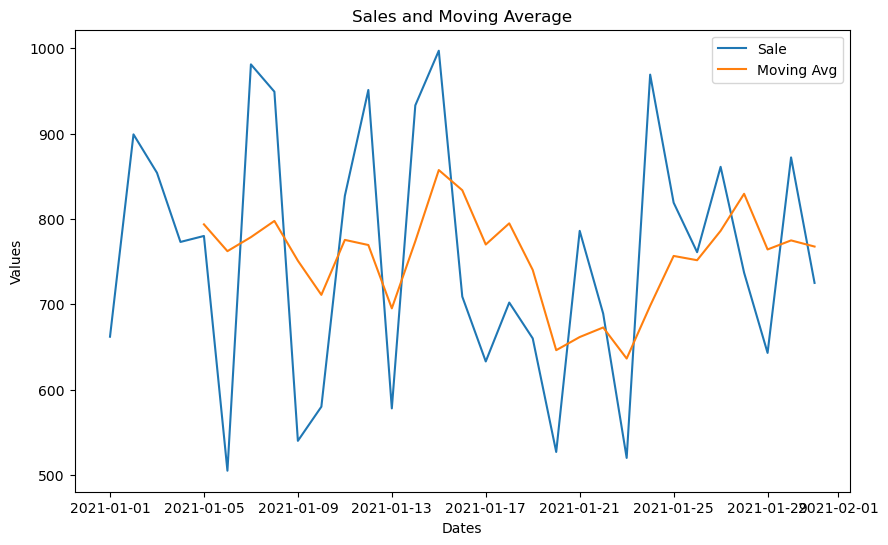

In [85]:
# Create DataFrame DS
date_rng_ds = pd.date_range(start='2021-01-01', end='2021-01-31')
sale_values = np.random.randint(500, 1001, size=len(date_rng_ds))
df = pd.DataFrame({'Dates': date_rng_ds, 'Sale': sale_values})

# Calculate the rolling average of 5 consecutive values in the 'Sale' column
df['Moving Avg'] = df['Sale'].rolling(window=5).mean()

# Plot line plots
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Dates'], df['Sale'], label='Sale')
plt.plot(df['Dates'], df['Moving Avg'], label='Moving Avg')
plt.title('Sales and Moving Average')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.legend()
plt.show()

#### The rolling method is used to smooth out fluctuations in the data and highlight trends or patterns. In this case, the rolling average provides a smoothed representation of the 'Sale' values over time, making it easier to identify overall trends and changes in the data.